# RNN stock price predictor

Using Recurrent neural network (RNN) and Long short-term memory (LSTM) algorithm, one of deep learning technique, we'll predict selected ticker's future price. 

Note : This is just a basic code, hence it's not suitable to apply in real life market, and any investment should be your own decision also risk you take.





## Recurrent Neural Network (RNN)

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. In RNN, neuron is called cell, information of previously trained cell is used for next cell, hence it is suitable to process sequential data.

[image : RNN]

## Long short-term memory

RNN can store short-term memory, to find correlations of data, it needs long term memory, LSTM is used to support 
this.

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.


## Stock price predictor


### data cleansing

In [47]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
yf.pdr_override()
import matplotlib.pyplot as plt

    
def get_tickers(tickers, date_from):
    x = pdr.get_data_yahoo(tickers, start=date_from)
    df = pd.DataFrame(x[['Open', 'High', 'Low', 'Volume', 'Adj Close']])
    df.fillna(method='bfill', inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.rename(columns={'Adj Close' : 'Close'}, inplace=True)
    return df

def Normalizer(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data, 0) - np.min(data,0)
    return numerator / (denominator + 1e-7)

In [48]:
tickers = ['BTC-USD']
df = get_tickers(tickers, '2014-10-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Volume,Close
Date,,,,,
2014-10-16,394.518005,398.807007,373.070007,26990000,382.556000
2014-10-17,382.756012,385.477997,375.389008,13600700,383.757996
2014-10-18,383.976013,395.157990,378.971008,11416800,391.441986
2014-10-19,391.253998,393.938995,386.457001,5914570,389.545990
2014-10-20,389.230988,390.084015,378.252014,16419000,382.845001
...,...,...,...,...,...
2021-05-27,39316.890625,40379.617188,37247.902344,43210968721,38436.968750
2021-05-28,38507.082031,38856.968750,34779.039062,55200191952,35697.605469
2021-05-29,35684.156250,37234.500000,33693.929688,45231013335,34616.066406


In [49]:
dfx = Normalizer(df)
dfy = dfx[['Close']]


x = dfx.values.tolist()
y = dfy.values.tolist()

In [50]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2014-10-16 to 2021-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Volume  2416 non-null   float64
 4   Close   2416 non-null   float64
dtypes: float64(5)
memory usage: 113.2 KB


In [51]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2014-10-16 to 2021-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2416 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB


In [52]:
data_x = []
data_y = []
window_size = 10
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # not including next day close (i+window_size)
    _y = y[i + window_size] # Next day close
    data_x.append(_x)
    data_y.append(_y)

Run `print(_x, "->", _y)` to see _x values added to data_x and _y

In [53]:
print(_x, "->", _y)

[[0.6380751025636054, 0.6490263554218816, 0.539108885297013, 0.23377373049043113, 0.5862831558617594], [0.5871504296365694, 0.5973473676379949, 0.5675953935369413, 0.16346884925210348, 0.5899458500509391], [0.5896828041945557, 0.5889664784852006, 0.5005980649054943, 0.223566522230465, 0.5462658608361611], [0.5449909903319163, 0.6128781443171756, 0.5541744438135532, 0.19191155841330934, 0.6084115605720756], [0.6096416797103922, 0.6119688199588053, 0.5869022154666724, 0.16014838336790635, 0.6036147802440194], [0.6032774136724384, 0.627524973131708, 0.6082507097467215, 0.1462859701437501, 0.6177003953360994], [0.6178679659142444, 0.6212998775408176, 0.5976452844379659, 0.12310464049776679, 0.6041634719059887], [0.6050842441427322, 0.5977481953983556, 0.5578489503161747, 0.15726566736609135, 0.5609049173662612], [0.5605212473461467, 0.5726525348735815, 0.5403577528188697, 0.12886037604497394, 0.5438258330249347], [0.5435235610734752, 0.5597551736202859, 0.5375660295499092, 0.09015267728438

Past 10 days, given data, latest close is 0.8726370803053053, next day close is 0.8677396475977315

### Prepare train / test dataset

In [54]:
# train dataset
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

# test dataset
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

### Build model

In [63]:
model = keras.Sequential()
model.add(layers.LSTM(units=10, activation='relu',
                      return_sequences=True, input_shape=(window_size, 5)))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=1))
model.summary()

# from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Activation
# model = keras.Sequential()
# model.add(layers.LSTM(units=30, activation='relu',
#                       return_sequences=True, input_shape=(window_size, 5)))
# model.add(layers.Dropout(0.1))
# model.add(layers.LSTM(units=40, activation='relu', return_sequences=True))
# model.add(layers.Dropout(0.2))
# model.add(layers.LSTM(units=60, activation='relu', return_sequences=True))
# model.add(layers.Dropout(0.3))
# model.add(layers.LSTM(units=90, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=1))
# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 10, 10)            640       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


### Model fit

In [67]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=20, batch_size=30)
pred_y = model.predict(test_x)

Epoch 1/20
57/57 [==============================] - 3s 15ms/step - loss: 1.9839e-04
Epoch 2/20
57/57 [==============================] - 1s 12ms/step - loss: 1.6740e-04
Epoch 3/20
57/57 [==============================] - 1s 9ms/step - loss: 1.9068e-04
Epoch 4/20
57/57 [==============================] - 1s 9ms/step - loss: 1.9632e-04
Epoch 5/20
57/57 [==============================] - 1s 9ms/step - loss: 1.7944e-04
Epoch 6/20
57/57 [==============================] - 1s 10ms/step - loss: 1.9163e-04
Epoch 7/20
57/57 [==============================] - 1s 9ms/step - loss: 1.6261e-04
Epoch 8/20
57/57 [==============================] - 1s 9ms/step - loss: 1.8336e-04
Epoch 9/20
57/57 [==============================] - 1s 9ms/step - loss: 1.8138e-04
Epoch 10/20
57/57 [==============================] - 1s 9ms/step - loss: 1.8593e-04
Epoch 11/20
57/57 [==============================] - 1s 10ms/step - loss: 1.7394e-04
Epoch 12/20
57/57 [==============================] - 1s 14ms/step - loss: 1.7897e

### Compare prediction to real

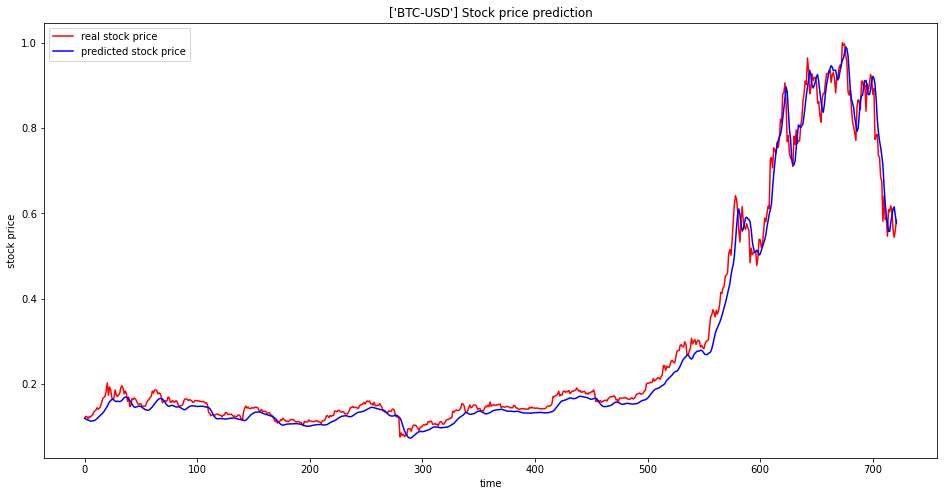

In [68]:
plt.figure(figsize=(16,8))
plt.plot(test_y, c='r', label='real stock price')
plt.plot(pred_y, c='blue', label='predicted stock price')
plt.title(f'{tickers} Stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

### Predict tomorrw's close price

In [69]:
print(f'{tickers} tomorrow price : {df.Close[-1]*pred_y[-1]/dfy.Close[-1]}')

['BTC-USD'] tomorrow price : [36666.05]


In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 30)            4320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 40)            11360     
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 40)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 10, 60)            24240     
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 60)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 90)               